## Read

In [1]:
import cv2 as cv




In [3]:
img =cv.imread('./Curso-Opencv-full/images/cat_large.jpg')
img2 = cv.imread('C:/Users/calanche/Desktop/buldozer-price-prediction-project/Curso-Opencv-full/images/cat.jpg')

In [4]:
import numpy as np

In [5]:
# cv.imshow('cat', img2)
cv.imshow('cat_large', img)
cv.waitKey(0)

100

## Reading videos


In [6]:
# si le pasas un integer, por ejemplo 0 activara la web camp, tambien admite un path
# el video se lee frame by frame
capture = cv.VideoCapture('./Curso-Opencv-full/videos/dog.mp4')
while True:
    isTrue, frame = capture.read()
    cv.imshow('video', frame)
    # si la letra d es presionada sale del loop
    if cv.waitKey(20) & 0xFF==ord('d'):
        break
capture.release()
cv.destroyAllWindows()




## Resizing & Rescaling 

Usually we resize and rescale video to prevent computational strain, rescale implies modifying its height and width to a particular height and width, usually downscale, (smaller)

In [7]:
def rescaleFrame(frame, scale=0.75):
    # Images, Videos, and live video
    width = int(frame.shape[1] * scale)
    
    height = int(frame.shape[0] * scale)
    
    dimensions = (width, height)
    
    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)
# Reading Videos
capture = cv.VideoCapture('./Curso-Opencv-full/videos/dog.mp4')
while True:
    
    isTrue, frame = capture.read()
    frame_resized = rescaleFrame(frame, scale= 0.2)
    cv.imshow('video', frame)
    cv.imshow('video Resized', frame_resized)
    # si la letra d es presionada sale del loop
    if cv.waitKey(20) & 0xFF==ord('d'):
        break
capture.release()
cv.destroyAllWindows()




In [11]:
resized_image = rescaleFrame(img2)
cv.imshow('Image', resized_image)
cv.waitKey(0)

-1

In [12]:
def changeRes(width, height):
    # live video
    capture.set(3, width)
    capture.set(4, height)
    

## Drawing Shapes & Putting Text 

In [39]:
import cv2 as cv

import numpy as np

blank = np.zeros((500, 500, 3), dtype='uint8')
# cv.imshow('Blank', blank)
img = cv.imread('./Curso-Opencv-full/images/cat.jpg')

# cv.imshow('Cat', img)

# 1. Paint the image a certain colour
# blank[200:300, 300:400] = 0, 0, 255
# cv.imshow('Blue', blank)

# 2. Draw a Rectangle

# cv.rectangle(blank, (0,0), (250, 250),  (255, 0, 0), thickness=2)
# cv.rectangle(blank, (0,0), (250, 250),  (255, 0, 0), thickness=cv.FILLED)
# cv.filled = -1


cv.rectangle(blank, (0,0), (img.shape[1]//2, img.shape[0]//2),  (255, 0, 0), thickness=2)
# cv.imshow('Rectangle', blank)



cv.waitKey(0)


-1

In [40]:
# 3. Drow a circle
# imagen, centro, radio, color
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (0, 0, 255), thickness=-1)

# cv.imshow('Circle',blank)



array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [41]:
# 4. Drow a line

cv.line(blank, (100,250),  (300, 400), (255, 255, 255), thickness=3) 

cv.imshow('Line', blank)

cv.waitKey(0)

-1

## Text on an image

In [44]:
# 5. Write text
# frame, texto, punto inicial
cv.putText(blank, 'Hello, my name is Jason', (0, 225), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0), 2)
cv.imshow('text', blank)
cv.waitKey(0)

-1

## Essential Functions 

In [45]:
import cv2 as cv
# bgr images
img = cv.imread('./Curso-Opencv-full/images/cat.jpg')

cv.imshow('cat', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow('Gray', gray)

# Converting to gray scale







cv.waitKey(0)

-1

In [50]:
# Blur(remove the noise in an image)

# blur = cv.GaussianBlur(img, (3,3), cv.BORDER_DEFAULT)
blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)

cv.imshow('cat', img)
cv.imshow('BLur', blur)
cv.waitKey(0)

-1

In [55]:
# Edge Cascade ( detector)
canny = cv.Canny (blur, 125, 175)

cv.imshow('Canny Edges', canny)


# para reducir el numero de edges podemos primero aplicar blur


# Dilating the image requiere structuring element


dilated = cv.dilate(canny, (7, 7), iterations=1 )
# permite dilater los edges
cv.imshow('Dilated', dilated )
cv.waitKey(0)

-1

In [56]:
# hay una forma de regresarnos despues de haber dilatado(eroding)
#Eroding


eroded = cv.erode(dilated, (3, 3), iterations=1)


cv.imshow('Eroded',eroded )
cv.waitKey(0)
# tiene una pequea diferencia con  structural element

-1

In [58]:
# Resize
# ignoring the aspect ratio

# para imagens mas grandes puees udes cv.INTER_LINEAR O cv.INTER_CUBIC
# cubic es slowest
resized = cv.resize(img, (500, 500), interpolation=cv.INTER_AREA)

cv.imshow('resized', resized)
cv.waitKey(0)

-1

In [60]:
# Cropping a portion of the images on the basis of your pixel values

cropped = img[50:200, 200:400]


cv.imshow('Cropped', cropped)
cv.waitKey(0)

-1

## Image transformation ( data augmentation)

rotation,

translation

resizing

clipping

an cropping

In [64]:
import cv2 as cv

import numpy as np

img = cv.imread('./Curso-Opencv-full/images/cat.jpg')


cv.imshow('cat', img)

# Translation
# shifting an image along the x and y axis

def translate(img, x, y):
    transMat = np.float32([[1, 0, x],
                           [0, 1, y]])
    
    dimensions = (img.shape[1], img.shape[0])
    
    return cv.warpAffine(img, transMat, dimensions)

# -x ---> left

# -y ----> up

# x ------> Right

# y -----> down

translated = translate(img, 100, 100)

    
cv.imshow('Translated', translated)

cv.waitKey(0)

-1

In [69]:
# Rotation

def rotate(img, angle, rotPoint=None):
    (height, width) = img.shape[:2]
    
    if rotPoint is None:
        # asume que la rotara desde el centro
        rotPoint = (width//2, height//2)
        
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width, height)
    
    
    return cv.warpAffine(img, rotMat, dimensions)

rotated = rotate(img, -45)

cv.imshow('Rotated', rotated)

rotated_rotated = rotate(img, -90)

cv.imshow('Rotated, Rotated', rotated_rotated)



cv.waitKey(0)

        


-1

In [70]:
# Resizing

resized = cv.resize(img, (500, 500), interpolation=cv.INTER_CUBIC)

cv.imshow('Resized', resized)


cv.waitKey(0)

-1

In [71]:
# Flipping es como voltear
# 0 flipping vertically that is over the x axis, 1 flipping is horizontal over the y axis, -1 is both
flip = cv.flip(img, -1)

cv.imshow('Flip', flip)
cv.waitKey(0)



-1

In [ ]:
# Cropping , es recortar

cropped = img[200:400, 300:400]

cv.imshow('Cropped', cropped)


cv.waitKey(0)

## Contour Detection 
are basically the boundaries of objects, the line or curve that joins the  continuos points along the boundary of an objet. Now from a mathematical point of view the're not the same as edges. For the most part, you can get away with thinking of contours as edges, but from a mathematical point of view, contours and edges are two different things, contours are usefu tools when you get into shape analysis and object detection and recognition.


In [16]:
# recuerda joel son 3 instrucciones indispensables al trabajar con imagenes, el read, al show y el wait

import cv2 as cv

import numpy as np


img = cv.imread('./Curso-Opencv-full/images/cats 2.jpg')

cv.imshow('cats', img)

blank = np.zeros(img.shape, dtype='uint8')

cv.imshow('Blank', blank)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow('Gray', gray)


blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
cv.imshow('Blur', blur)




# # edges detector

canny = cv.Canny(blur, 125, 175)

cv.imshow('Canny Edges', canny)
# (edges, mod) chain_approx_simple/none, none te regresa mas informacion, 


# ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
# threshold es si un pixel es menor 125 sera seteado a 0
# cv.imshow('Thresh', thresh)

# contours, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

print(F"{len(contours)} contour(s) found!")

cv.drawContours(blank, contours, -1, (0, 0, 255), 2)

cv.imshow('Contour Drawn', blank)

cv.waitKey(0)

69 contour(s) found!


-1

## Color Spaces


In [18]:
img = cv.imread('./Curso-Opencv-full/images/cat.jpg')
cv.imshow('Cat', img)
# BGR to Grayscale

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


cv.imshow('Gray', gray)
cv.waitKey(0)

-1

In [19]:
img = cv.imread('./Curso-Opencv-full/images/cat.jpg')
cv.imshow('Cat', img)
# BGR to HSV

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)


cv.imshow('HSV', hsv)
cv.waitKey(0)

-1

In [20]:
img = cv.imread('./Curso-Opencv-full/images/cat.jpg')
cv.imshow('Cat', img)
# BGR to L*A*B

lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)


cv.imshow('LAB', lab)
cv.waitKey(0)

# open cv por default lee images on BGR (blue, green, red) format

-1

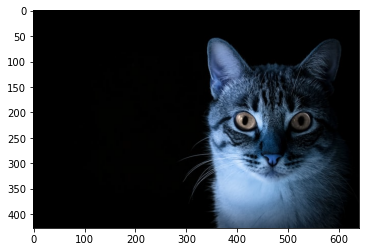

In [21]:
# BGR is the oppositive RGB
import matplotlib.pyplot as plt
plt.imshow(img)

plt.show()



In [23]:
img = cv.imread('./Curso-Opencv-full/images/cat.jpg')
cv.imshow('Cat', img)
# BGR to RGB

rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)




cv.imshow('RGB', rgb)
cv.waitKey(0)




-1

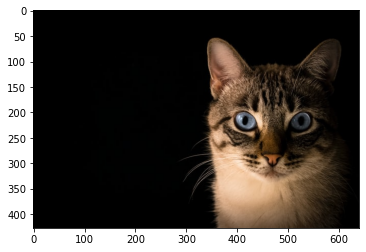

In [24]:
plt.imshow(rgb)

plt.show()

In [26]:
# HSV to BGR
hsv_bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

cv.imshow('HSV----> BGR', hsv_bgr)

cv.waitKey(0)




-1

## COLOR CHANNELS

In [27]:
img = cv.imread('./Curso-Opencv-full/images/cat.jpg')
cv.imshow('Cat', img)
# split me permite separar en los distintos color chanel
b, g, r =cv.split(img)

cv.imshow('BLue', b)

cv.imshow('Green', g)

cv.imshow('Red', r)


print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

cv.waitKey(0)

# las imagenes se despliegan en escala de grises donde a mayor concentracin de un color se tornara blanco,

# grayscale images have shape of one

(427, 640, 3)
(427, 640)
(427, 640)
(427, 640)


-1

In [28]:
# merged imagenes

merged = cv.merge([b, g, r])

cv.imshow('Merged Image', merged)


cv.waitKey(0)

-1

In [29]:
blank = np.zeros(img.shape[:2], dtype='uint8')
red = cv.merge([blank, blank, r])
blue =  cv.merge([b,  blank, blank])
green = cv.merge([blank, g, blank])

cv.imshow('Blue', blue)
cv.imshow('Green', green)
cv.imshow('Red', red)


print(img.shape)

cv.waitKey(0)






(427, 640, 3)


-1

## Blurring Techniques

we gererally smooth and image when it tends to have a lot of noise, and noise that's caused from camera sensors are basically problems in lighting when the image was taken. And we can essentially smooth out the image or reduce some of the noise by applying some blurring method

dentro de un kernel , hay varios metodos, blur is applied to the middle pixels as a result of the pixels around it also called the surrounding pixels. 




In [33]:
img = cv.imread('./Curso-Opencv-full/images/cat.jpg')
cv.imshow('Cat', img)

# Averaging
average = cv.blur(img, (7,7))
cv.imshow('Average Blur', average)

cv.waitKey(0)


-1

In [35]:
average = cv.blur(img, (3,3))
cv.imshow('Average Blur', average)

# Gaussian Blur
#(imagen, kernel size, estandar deviation)


gauss = cv.GaussianBlur(img, (3,), 0)

cv.imshow('Gaussian Blur', gauss)

cv.waitKey(0)

# gaus es menos que el average method because a certain weight value was added when computing the blur

-1

In [37]:
# Median blur

# generaly median blurring to be more effective in reducing noise in an image as compared to averaging
# and even Gaussian Blur, todo depende del problmea y la reduccion sustancial de la cantidad de ruido


median = cv.medianBlur(img, 7)

cv.imshow('Median blur', median)

cv.waitKey(0)

# Median blur is not meant for high kernal sizes like seven or even 5 in some cases

# and is effective to reducing some of the noise in the image.

-1

In [39]:
average = cv.blur(img, (3,3))
cv.imshow('Average Blur', average)

# Gaussian Blur
#(imagen, kernel size, estandar deviation)


gauss = cv.GaussianBlur(img, (3, 3), 0)

cv.imshow('Gaussian Blur', gauss)

# Median Blur
median = cv.medianBlur(img, 3)

cv.imshow('Median blur', median)


# Median blur is not meant for high kernal sizes like seven or even 5 in some cases

# and is effective to reducing some of the noise in the image.

cv.waitKey(0)


-1

In [41]:
# Bilateral
# the most efective  is used alot of advanced compurter vision  projects,
# esseantially because of how it blurs. Now traditional
# Traditional blurring methods basically blur the image without looking at whether you're, whether you're reducing edges in the image or not

# bilateral blurring applies blurring but retains  the edges in the image. So you have a blurred image, but you get to retain the edges as well


# Bilateral
# larger values of this space sigma means that pixels further out from  the central pixel will influence the blurring calculation
bilateral = cv.bilateralFilter(img, 5, 15, 15)

cv.imshow('Bilateral', bilateral)

cv.waitKey(0)

-1

## BITWISE OPERATIONS

In [42]:
import cv2 as cv

import numpy as np

blank = np.zeros((400, 400), dtype='uint8')

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)

circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)


cv.imshow('Rectangle', rectangle)

cv.imshow('Circle', circle)

cv.waitKey(0)

-1

In [43]:
# bitwise AND ====> intersecting regions
# retorna la intercepcion entre dos conjuntos(dos imagenes)

bitwise_and = cv.bitwise_and(rectangle, circle)

cv.imshow('Bitwise AND', bitwise_and)
cv.waitKey(0)

-1

In [44]:
# Bitwise OR =====. non intersecting region and intersecting regions
# return intercep and not intercep region (Both)


bitwise_or = cv.bitwise_or(rectangle, circle)

cv.imshow('Bitwise OR', bitwise_or)


cv.waitKey(0)

-1

In [48]:
# Bitwise XOR (non intesecting region) (disjuntoos)

bitwise_xor = cv.bitwise_xor(rectangle, circle)

cv.imshow('Bitwise XOR', bitwise_xor)
cv.waitKey(0)

-1

In [49]:
# bitwise NOT, this inverts the binary color
# si es blanco lo vuelve negro y si es negro, se vuelve blanco

bitwise_not = cv.bitwise_not(rectangle)
cv.imshow('Rectangle Not', bitwise_not)
cv.waitKey(0)

-1

In [50]:
bitwise_not = cv.bitwise_not(circle)
cv.imshow('Circle Not', bitwise_not)
cv.waitKey(0)

-1

## Masking 

masking essentially allows us to focus on certain parts of an image that we'd like to focus on. So for example, if you have an image of people in it, and if you're interested in focusing on the faces of those people, you could essentially apply  masking and essentially mask over the people's faces and remove all the the unwanted parts of the images. So that's basically our high level intuiton behind this


In [66]:
import numpy as np

# the dimention of the mask has to be the same size as that of the image

img = cv.imread("./Curso-Opencv-full/images/cats 2.jpg")

cv.imshow('Cat', img)

blank = np.zeros(img.shape[:2], dtype='uint8')
cv.imshow('Blank image', blank)
#/----------------------------x, y
# mask = cv.circle(blank, (img.shape[1]//2 + 130, img.shape[0]//2  ), 100, 255, -1)

# mask = cv.circle(blank, (img.shape[1]//2 + 130, img.shape[0]//2  ), 100, 255, -1)

circle = cv.circle(blank.copy(), (img.shape[1]//2 + 45, img.shape[0]//2), 100, 255, -1)

# mask = cv.rectangle(blank, (img.shape[1]//2, img.shape[0]//2  ),(img.shape[1]//2 + 100, img.shape[0]//2 + 100), 255, -1)

cv.imshow('Mask', mask)


rectangle = cv.rectangle(blank.copy(), (30, 30), (370, 370), 255, -1)

weird_shape = cv.bitwise_and(circle, rectangle)

cv.imshow('Weird Shape', weird_shape)

masked = cv.bitwise_and(img, img, mask=weird_shape)

cv.imshow('Masked Image', masked)
cv.waitKey(0)




-1

## Computing Histograms

allow you to visualize the distribution of pixel intesities in an image

In [ ]:
import matplotlib.pyplot as plt
img = cv.imread('./Curso-Opencv-full/images/')

cv.imshow('cat', img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow('Gray', gray)


# Grayscale histogram
#histSize = numero de bin
gray_hist =  cv.calcHist([gray], [0], None, [256], [0,256] )


plt.figure()

plt.title('Grayscale Histogram')

plt.xlabel('Bins')

plt.ylabel('# of pixcels')

plt.plot(gray_hist)

plt.xlim([0, 256])

plt.show()



cv.waitKey(0)

